Reference: https://towardsdatascience.com/introducing-pycircular-a-python-library-for-circular-data-analysis-bfd696a6a42b

Reproduced for understanding the package

In [1]:
!pip install pycircular

  Preparing metadata (setup.py) ... done
  Created wheel for pycircular: filename=pycircular-0.1.2-py3-none-any.whl size=18555 sha256=c701663f355444767341b0c4c80fa16d480b97751aeda7f688e3d1abed76ffeb
  Stored in directory: /root/.cache/pip/wheels/a4/c6/ca/d7a694d2782aba7f6d71ca69b6ef4dbbbf426b729da3e6101c
Successfully built pycircular


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pycircular

In [5]:
df = pycircular.datasets.load_transactions()['data']
df.head()

,user,type,amt,date
1,1,1,-0.334,2020-01-01 03:09:57
5,2,1,-0.238,2020-01-01 04:01:43
6,1,1,-0.247,2020-01-01 16:37:52
9,1,2,0.537,2020-01-01 19:16:12
12,1,2,0.537,2020-01-01 19:16:58


In [6]:
df.shape

(529, 4)

In [7]:
df['date'] = pd.to_datetime(df['date'])
dates = df.loc[df['user']==1,"date"]
print(dates.head())
print(dates.describe(datetime_is_numeric=True))

1    2020-01-01 03:09:57
6    2020-01-01 16:37:52
9    2020-01-01 19:16:12
12   2020-01-01 19:16:58
15   2020-01-01 19:17:48
Name: date, dtype: datetime64[ns]
count                              349
mean     2020-04-03 01:32:31.352435712
min                2020-01-01 03:09:57
25%                2020-02-09 08:44:55
50%                2020-03-27 01:00:01
75%                2020-05-25 00:36:32
max                2020-07-29 22:39:35
Name: date, dtype: object


<Axes: xlabel='date'>

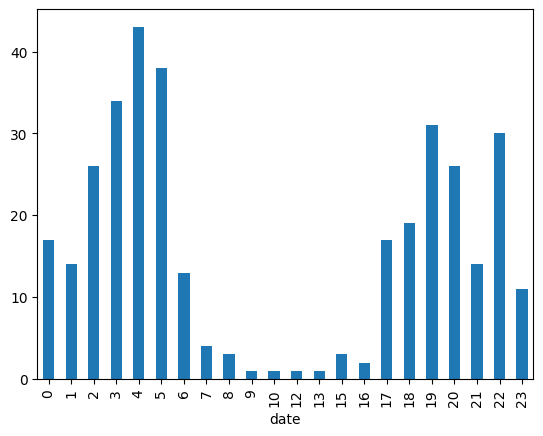

In [8]:
dates.groupby(dates.dt.hour).count().plot(kind="bar")

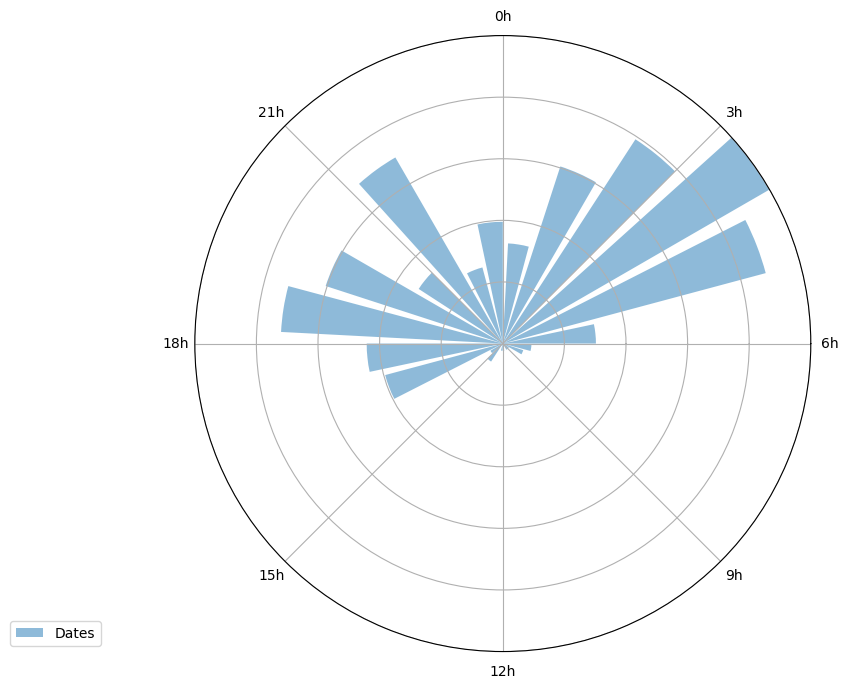

In [11]:
time_segment = "hour" #"dayweek", "daymonth"
freq_arr, times = pycircular.utils.freq_time(dates, time_segment=time_segment)
fig, ax1 = pycircular.plots.base_periodic_fig(freq_arr[:,0], freq_arr[:,1], time_segment=time_segment)
ax1.legend(bbox_to_anchor = (-0.3,0.05), loc="upper left", borderaxespad=0)

In [12]:
freq_arr

array([[4.00000000e+00, 1.23209169e-01],
       [5.00000000e+00, 1.08882521e-01],
       [3.00000000e+00, 9.74212034e-02],
       [1.90000000e+01, 8.88252149e-02],
       [2.20000000e+01, 8.59598854e-02],
       [2.00000000e+01, 7.44985673e-02],
       [2.00000000e+00, 7.44985673e-02],
       [1.80000000e+01, 5.44412607e-02],
       [0.00000000e+00, 4.87106017e-02],
       [1.70000000e+01, 4.87106017e-02],
       [1.00000000e+00, 4.01146132e-02],
       [2.10000000e+01, 4.01146132e-02],
       [6.00000000e+00, 3.72492837e-02],
       [2.30000000e+01, 3.15186246e-02],
       [7.00000000e+00, 1.14613181e-02],
       [1.50000000e+01, 8.59598854e-03],
       [8.00000000e+00, 8.59598854e-03],
       [1.60000000e+01, 5.73065903e-03],
       [1.20000000e+01, 2.86532951e-03],
       [9.00000000e+00, 2.86532951e-03],
       [1.00000000e+01, 2.86532951e-03],
       [1.30000000e+01, 2.86532951e-03]])

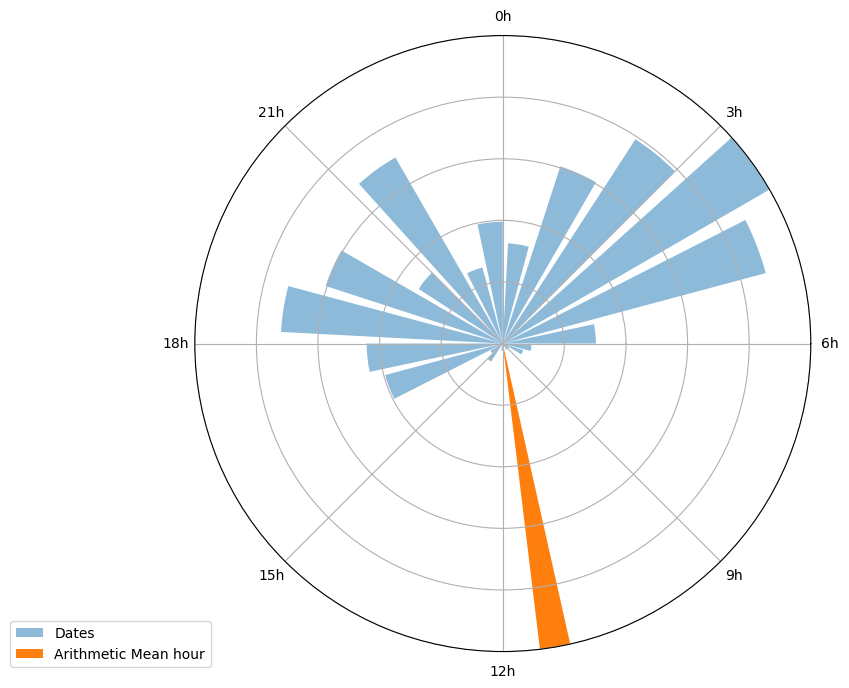

In [13]:
dates_mean = times.values.mean()
fig, ax1 = pycircular.plots.base_periodic_fig(freq_arr[:,0], freq_arr[:,1], time_segment=time_segment)
ax1.bar([dates_mean], [1], width=0.1, label="Arithmetic Mean hour")
ax1.legend(bbox_to_anchor = (-0.3,0.05), loc="upper left", borderaxespad=0)

$D \approx vonmises(\mu_{vM}, \frac{1}{\mu_{vM}})$



In [15]:
radians = pycircular.utils._date2rad(dates, time_segment="hour")
mean, std = pycircular.stats.periodic_mean_std(radians)

In [16]:
radians

1      0.741983
6      3.499967
9      2.809107
12     2.805762
15     2.802126
         ...   
91     2.856377
94     2.145591
97     1.846631
104    0.897899
108    1.921680
Name: date, Length: 349, dtype: float64

In [18]:
print("mean=",mean)
print("std-dev=",std)

mean= 1.3558648395695643
std-dev= 1.2231326790869306


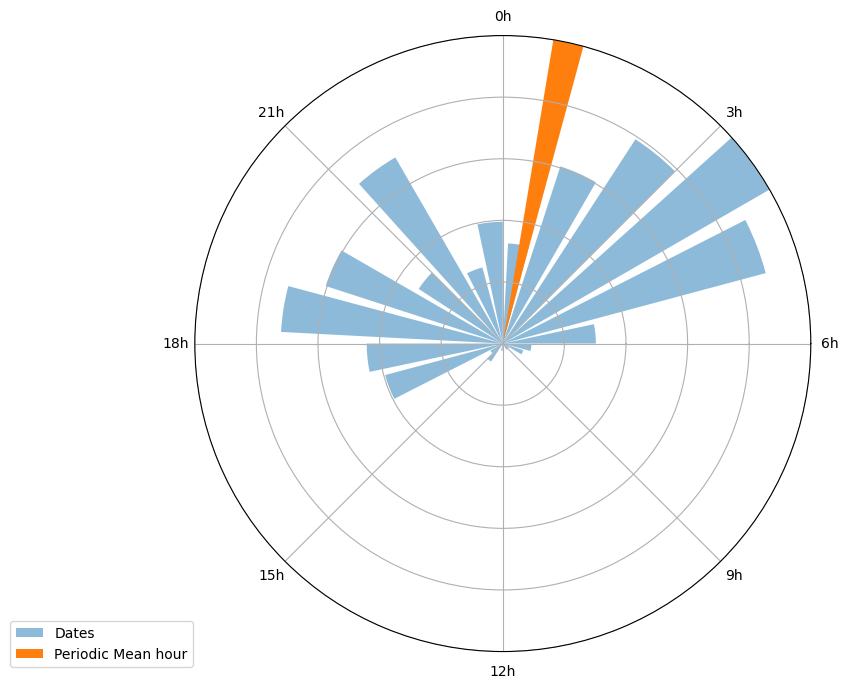

In [19]:
fig, ax1 = pycircular.plots.base_periodic_fig(freq_arr[:,0], freq_arr[:,1], time_segment=time_segment)
ax1.bar([mean], [1], width=0.1, label="Periodic Mean hour")
ax1.legend(bbox_to_anchor = (-0.3,0.05), loc="upper left", borderaxespad=0)

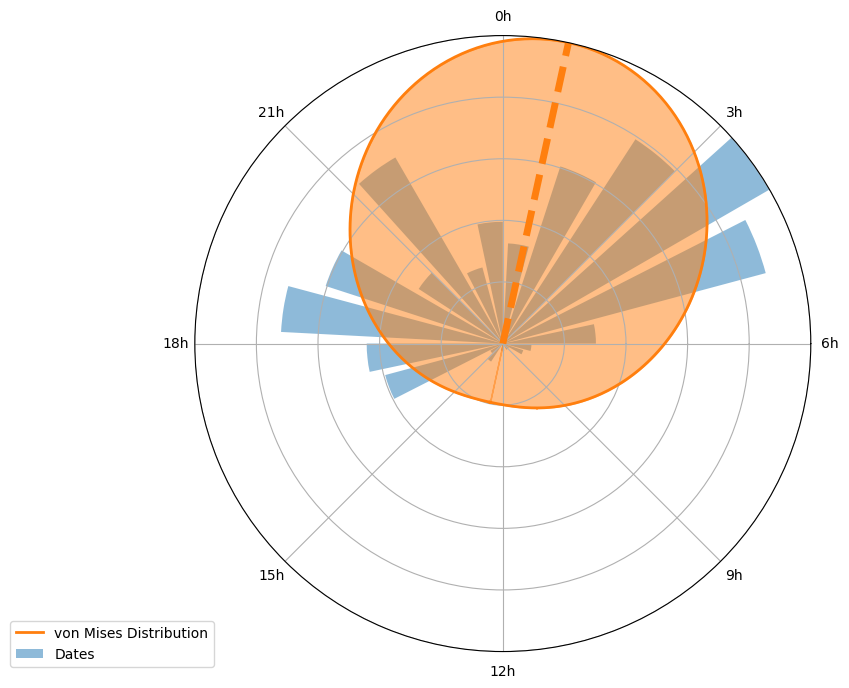

In [20]:
x, p = pycircular.stats.von_mises_distribution(mean, std)
fig, ax1 = pycircular.plots.base_periodic_fig(freq_arr[:,0], freq_arr[:,1], time_segment=time_segment)
ax1 = pycircular.plots.clock_vonmises_distribution(ax1, mean, x, p)

It is difficult to model a multimodal data using a single mode distribution as above so it is advisable to use the Kernel based method such as Kernel density estimation (KDE) with Von Mises

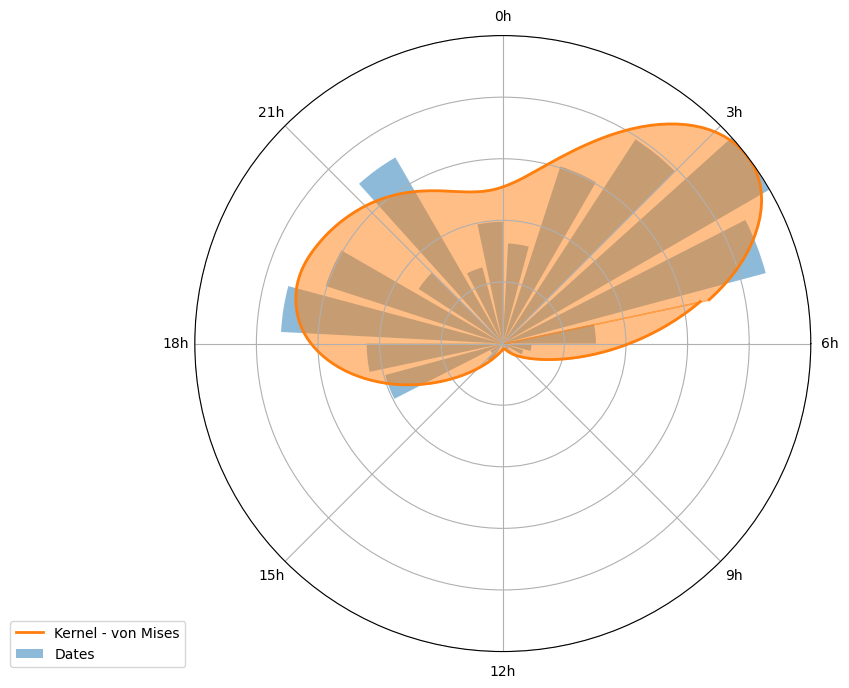

In [22]:
y = pycircular.circular.kernel(radians.values)
fig, ax1 = pycircular.plots.plot_kernel(freq_arr[:,0], freq_arr[:,1], y, time_segment=time_segment)


### Using the kernel to create new features

In [23]:
y_test = pd.DataFrame(pd.to_datetime([
    '2023-01-01 12:00:00',
    '2023-01-01 03:00:00',
    '2023-01-01 18:00:00',
]), columns = ['dates'])

y_test

,dates
0,2023-01-01 12:00:00
1,2023-01-01 03:00:00
2,2023-01-01 18:00:00


In [24]:
radians = pycircular.utils._date2rad(y_test['dates'], time_segment = 'hour')
y_test['prob'] = pycircular.circular.predict_proba(radians, y)

y_test

,dates,prob
0,2023-01-01 12:00:00,0.017654
1,2023-01-01 03:00:00,0.838482
2,2023-01-01 18:00:00,0.500127


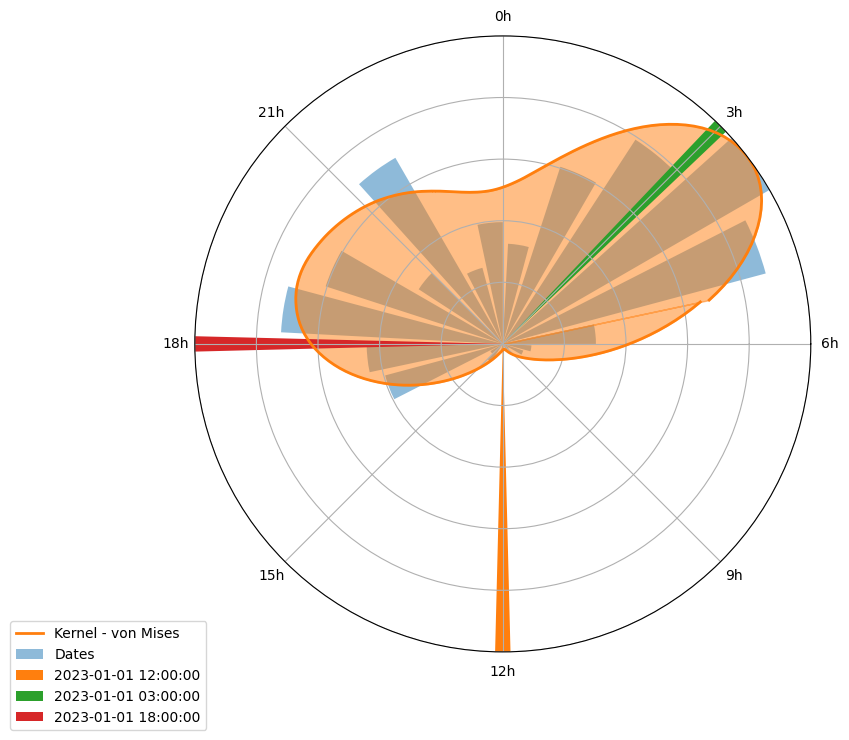

In [25]:
fig, ax1 = pycircular.plots.plot_kernel(freq_arr[:,0], freq_arr[:,1], y, time_segment=time_segment)

for i in range(y_test.shape[0]):
  ax1.bar([radians[i]], [1], width=0.05, label=y_test.loc[i, 'dates'])

ax1.legend(bbox_to_anchor = (-0.3,0.05), loc="upper left", borderaxespad=0)